**Leemos las imágenes del corpus olivetti**

In [1]:
from sklearn.datasets import fetch_olivetti_faces
orl = fetch_olivetti_faces()
X = orl.data

**Principal Component Analysis (PCA)**

In [2]:
import numpy as np
S = np.cov(X.T, bias=True)
La, U = np.linalg.eigh(S)
i = La.argsort()[::-1]; La = La[i]; U = U[:,i]

**Blanqueado ZCA**

In [3]:
m = np.mean(X, axis=0)
W = U @ np.sqrt(np.linalg.pinv(np.diag(La))) @ U.T
Xw = (X - m) @ W.T

**Visualizamos las imágenes**

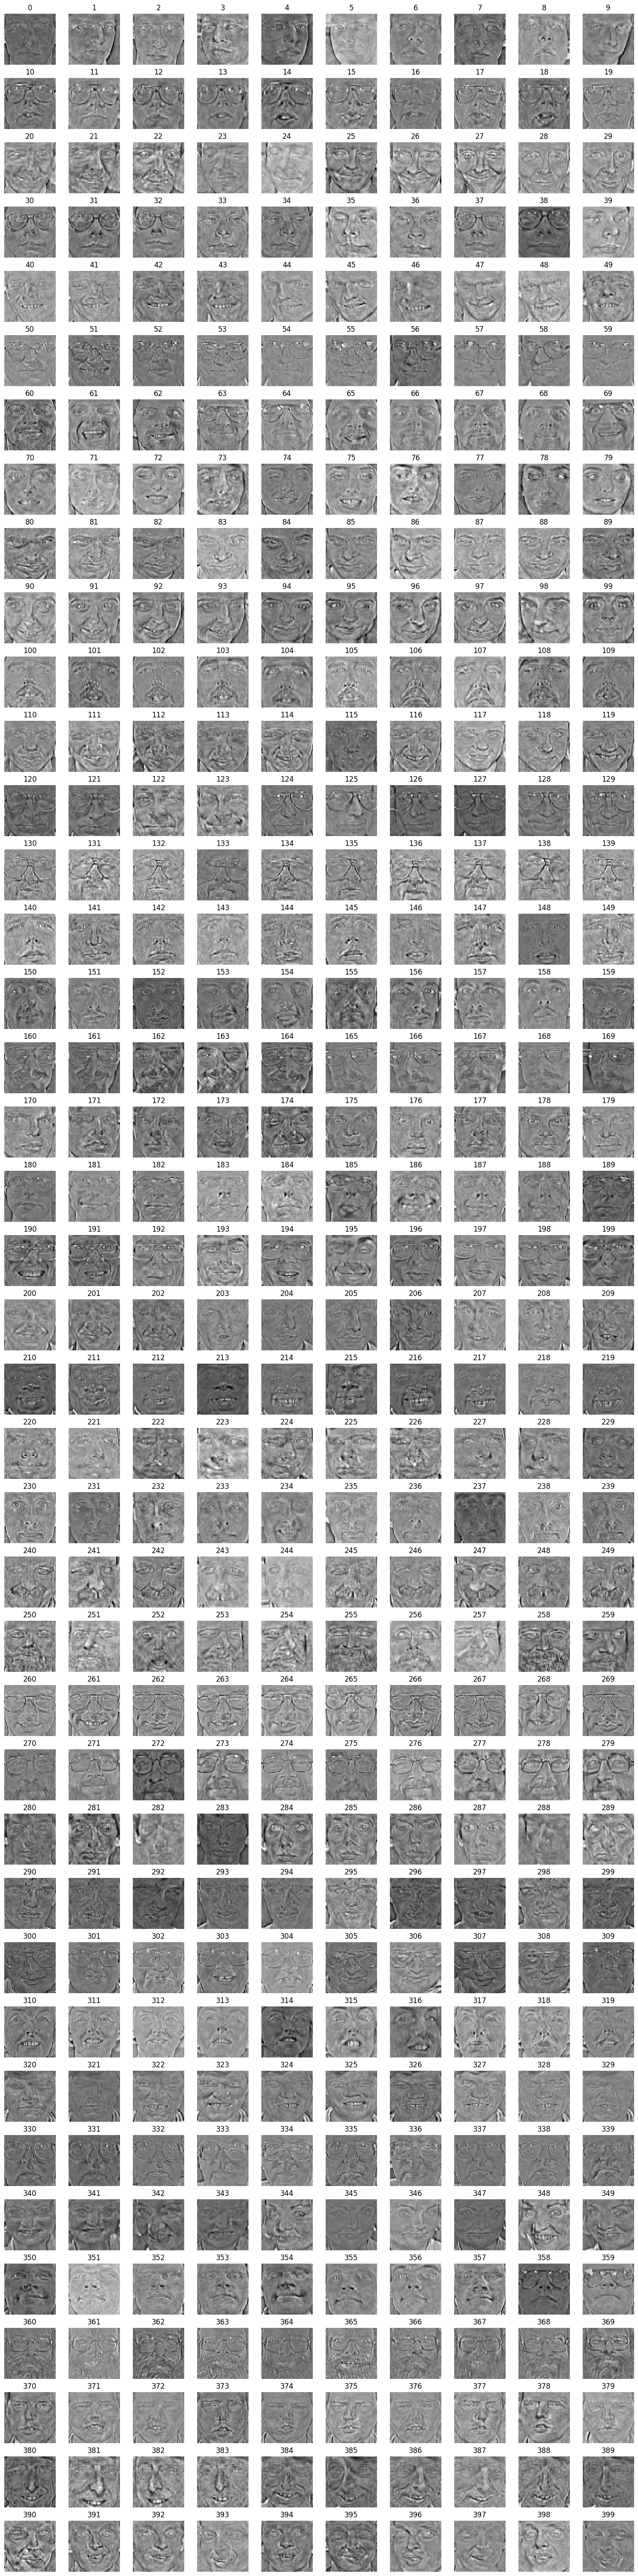

In [4]:
import matplotlib.pyplot as plt
nrows, ncols = 40, 10
fig, axes = plt.subplots(nrows=nrows, ncols=ncols, figsize=(15, 15*nrows/ncols), constrained_layout=True)
for c in np.arange(0, 400):
    ax = axes.flat[c]
    ax.set_axis_off()
    ax.imshow(Xw[c,:].reshape(64,64), cmap=plt.cm.gray, interpolation="none")
    ax.set_title("{:}".format(c))